Analise Receita Total

In [1]:
import sys
import os

# garantir que a classe databasemanager é importada
sys.path.append(os.path.abspath("C:/Users/tutas/Documents/Projetos GitHUB/ProjetoAnaliseVendas"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging


# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager("../database/loja.db")

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_vendas.head())

,id,nome,preco
0,1,Produto 1,4872
1,2,Produto 2,2680
2,3,Produto 3,551
3,4,Produto 4,3350
4,5,Produto 5,4180


,id,id_produto,id_cliente,quantidade,data
0,1,24,83,10,2025-01-16
1,2,67,74,6,2025-01-02
2,3,21,40,10,2025-01-17
3,4,99,92,1,2025-01-05
4,5,59,95,1,2025-01-31


In [3]:
# Código para calcular produtos mais vendidos
df_merged = df_vendas.merge(df_produtos, left_on="id_produto", right_on="id")

#calcular a receita por venda
df_merged["Receita_Venda"]=df_merged["quantidade"]*df_merged["preco"]

display(df_merged.head())



,id_x,id_produto,id_cliente,quantidade,data,id_y,nome,preco,Receita_Venda
0,1,24,83,10,2025-01-16,24,Produto 24,4350,43500
1,2,67,74,6,2025-01-02,67,Produto 67,1474,8844
2,3,21,40,10,2025-01-17,21,Produto 21,4234,42340
3,4,99,92,1,2025-01-05,99,Produto 99,559,559
4,5,59,95,1,2025-01-31,59,Produto 59,1130,1130


In [4]:
#receita total por produto, do maior para o menor faturamento
receita_por_produto=df_merged.groupby("nome")["Receita_Venda"].sum().sort_values(ascending=False)
receita_por_produto_df=receita_por_produto.reset_index()
print(receita_por_produto_df.head(10))

         nome  Receita_Venda
0  Produto 42         136668
1  Produto 27          75200
2  Produto 44          70704
3  Produto 28          68292
4  Produto 96          64456
5  Produto 21          59276
6  Produto 64          49480
7  Produto 25          45696
8  Produto 24          43500
9  Produto 95          42330


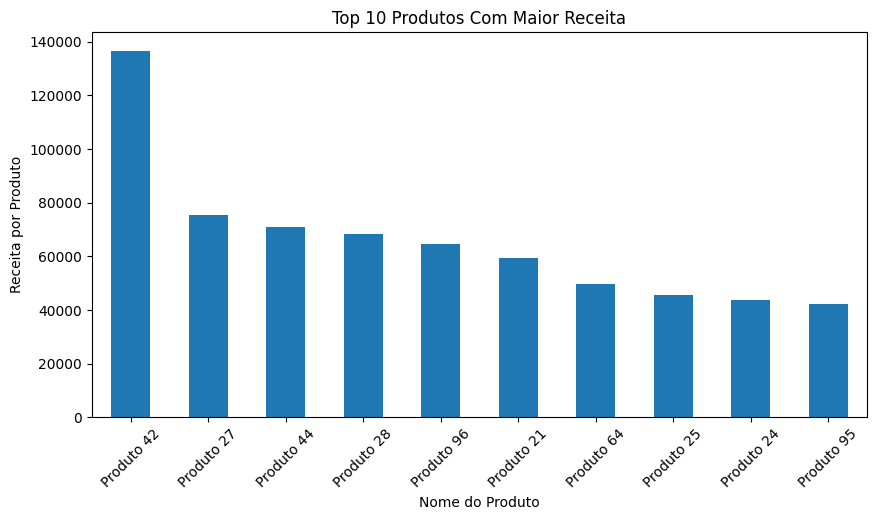

In [5]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(receita_por_produto, "Top 10 Produtos Com Maior Receita", "Nome do Produto", "Receita por Produto")

In [6]:

from utils.funcoes import guardar_analise_csv

# guardar ficheiro em csv
guardar_analise_csv(receita_por_produto_df, "top10_receita_por_produto")



